# <center>Palmer Penguins Exploratory Data Analysis</center>

###### *Irina Simoes*

## Table of Contents

- [Underline](#underline)
- [Indent](#indent)
- [Center](#center)
- [Color](#color)

----

## 1. Introduction

This exploratory data analysis (EDA) </a><sup>[1]</sup></a><sup>[2]</sup></a><sup>[3]</sup> aims to provide insights on the variables of the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html), which was first introduced by Allison Horst, Alison Hill, and Kristen Gorman in 2020. The dataset is a collection of data about three different species of penguins inhabiting the Palmer Archipelago near Palmer Station in Antarctica, which wwere collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

For this analysis, we will focus on exploring the data to gain insights on the underlying attributes with the end goal of uncovering patterns and identifying dependencies. Namely, we will seek to explore the [correlation between two of the variables](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f), whether they are causal or not.

<sup>[1] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python">Exploratory Data Analysis</a></sup><br><sup>[2] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python-set-1/">Exploratory Data Analysis in Python | Set 1</a></sup><br><sup>[3] <a href="https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/">What is Exploratory Data Analysis?</a></sup>


----

## 2. Data Exploration

> 📝 **Load all the required libraries for the analysis**
* seaborn
* pandas
* numpy
* matplotlib

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> 📝 **Load the dataset which our analysis will be based on**

As stated in the [official documentation for the Seaborn library](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), datasets can be loaded from an [online repository](https://github.com/mwaskom/seaborn-data):
- first by invoking *get_dataset_names()* to check if Palmer Penguins is listed as one of the 
of available datasets;
- secondly by invoking seaborn.load_dataset() with the actual database name to load it into our project, namely *penguins*. 

The loaded dataset is a DataFrame object by default, as Seaborn library is built on top of Pandas.

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
df = sns.load_dataset("penguins")

> 📝 **Gain general knowledge about the data**

We should get a basic understanding of the data structure, format, and characteristics by inspecting the dataset's dimensions, data types, presence of missing values and/or duplicate records, as well as exploring some initial summary statistics and visualizations.

* Check for the DataFrame dimensionality with Pandas `.info()` method to return a summary with the total number of rows and columns, count of non-null values and data types, as per [pandas official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). We can then understand the size and structure of the dataset before performing further analysis. 
    
    We see that four variables are numeric (type ``float64``), and three variables are categorical (type ``object``). This also give us a quick glimpse of missing values in five of the columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


* Understand the distribution of numerical data by generating descriptive statistics with [Pandas .describe method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe). It provides a quick summary that helps us understand the penguins characteristics central tendency, variability, and range. 

$*identify potential outliers or anomalies? check for literature.*

In [59]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [61]:
# Printing Top 10 records 
print("Head -- \n", df.head(10), "\n\n") 

Head -- 
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  


In [63]:
 # Printing last 10 records  
print("Tail -- \n", df.tail(10), "\n\n") 

Tail -- 
     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
334  Gentoo  Biscoe            46.2           14.1              217.0   
335  Gentoo  Biscoe            55.1           16.0              230.0   
336  Gentoo  Biscoe            44.5           15.7              217.0   
337  Gentoo  Biscoe            48.8           16.2              222.0   
338  Gentoo  Biscoe            47.2           13.7              214.0   
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
334       4375.0  Female  
335       5850.0    Male  
336       4875.0     NaN  
337       6000.0    Male  
338       4925.0  Female  
339          NaN     NaN

In [62]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

## 3. Relationship between variables

<Axes: >

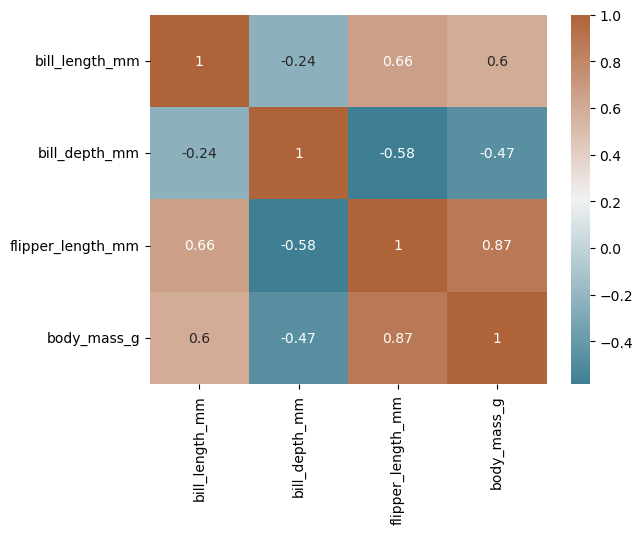

In [52]:
# Calculate correlation matrix with .corr(). Since pandas version 2.0.0, the default value of numeric_only is now False, 
# so this param needs to be set as True due to the 3 categorical variables in the dataset.
corr = df.corr(numeric_only=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 30, as_cmap=True))

----

----

### X. Notes

1. Markdowns formatting of this Jupyter Notebook were based on:
* [The Jupyter Notebook Formatting Guide](https://medium.com/pythoneers/jupyter-notebook-101-everything-you-need-to-know-56cda3ea76ef) by Raghu Prodduturi
* [Markdown Cheat Sheet](https://markdownguide.offshoot.io/cheat-sheet/)
* [Markdown Extended Syntax](https://markdownguide.offshoot.io/extended-syntax)